# Transactions data analysis
This notebook analyzes the provided Bank data to present the following:
* 3 Reports and Graphs of the data
* Fraud detection from the data

The snippet below installs the required dependencies.

In [1]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install openpyxl
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install numpy==1.21

You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.


Pandas is imported to load and analyze the data.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Loading the transactions information from an excel file.

In [3]:
bank_data = pd.read_excel("CC-3Y-Transactions.xlsx")

The available columns can now be inspected by showing a sample of the first 15 rows.

In [4]:
bank_data.head(10)

,City,Date,Card Type,Exp Type,Gender,Amount
0,"Delhi, India",2014-10-29,Gold,Bills,F,82475
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555
2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574
5,"Delhi, India",2014-09-08,Silver,Bills,F,100036
6,"Delhi, India",2015-02-24,Gold,Bills,F,143250
7,"Greater Mumbai, India",2014-06-26,Platinum,Bills,F,150980
8,"Delhi, India",2014-03-28,Silver,Bills,F,192247
9,"Delhi, India",2014-09-01,Platinum,Bills,F,67932


Let's review the structure and information of the dataset.

In [5]:
print(bank_data.shape)
bank_data.info()

(26052, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   City       26052 non-null  object        
 1   Date       26052 non-null  datetime64[ns]
 2   Card Type  26052 non-null  object        
 3   Exp Type   26052 non-null  object        
 4   Gender     26052 non-null  object        
 5   Amount     26052 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.2+ MB


From the information above, it's noticeable that there are not null entries in the records for each column, since the number of non-null entries for each one is equal to the total amount shown by `RangeIndex`, 26,052.

## Report 1: Top Cities Expenses
In this section exploration is carried based on the available cities. We start by adding the date component for easier grouping of the data.

In [6]:
bank_data['Year'] = pd.to_datetime(bank_data["Date"]).dt.strftime('%Y')
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   City       26052 non-null  object        
 1   Date       26052 non-null  datetime64[ns]
 2   Card Type  26052 non-null  object        
 3   Exp Type   26052 non-null  object        
 4   Gender     26052 non-null  object        
 5   Amount     26052 non-null  int64         
 6   Year       26052 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.4+ MB


City,"Bengaluru, India","Greater Mumbai, India","Ahmedabad, India","Delhi, India","Kanpur, India"
Year,,,,,
2013,84999287,84735652,83291837,82126961,19640338


City,"Bengaluru, India","Greater Mumbai, India","Ahmedabad, India","Delhi, India","Hyderabad, India"
Year,,,,,
2014,351482095,349709415,348289187,329591186,71066005


City,"Delhi, India","Greater Mumbai, India","Ahmedabad, India","Bengaluru, India","Kolkata, India"
Year,,,,,
2015,145211065,142306409,136213286,135845357,30918731


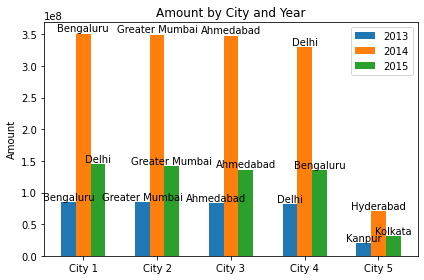

In [7]:
N = 5
x = np.arange(N)
width = 0.20

labels = [f"City {i}" for i in range(1, N+1)]
fig, ax = plt.subplots()

for idx, year in enumerate(sorted(bank_data['Year'].unique()), start=-1):
    data = bank_data[bank_data['Year'] == year].groupby(by=['Year', 'City']).agg({'Amount': 'sum'}).sort_values(by='Amount', ascending=False).head(N)

    org_columns = list(map(lambda c: c[1], data.index.values))
    display(data.pivot_table('Amount', ['Year'], 'City')[org_columns])

    rects = ax.bar(x + (idx*width), data['Amount'], width, label=year)

    for rect, label in zip(rects, data.index.values):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label[1].replace(', India', ''), ha="center", va="bottom"
        )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Amount')
ax.set_title('Amount by City and Year')
ax.set_xticks(x, labels)
ax.legend()

fig.tight_layout()

plt.show()

## Report 2: Gender Expenses Analysis
This section explores the expenses made by gender. The Quarter is calculated for each entry for easier grouping of the data.

In [8]:
def map_quarter(d):
    mint = int(pd.to_datetime(d).strftime('%m'))
    q = 1
    if mint > 3 and mint <= 6:
        q = 2
    elif mint > 6 and mint <= 9:
        q = 3
    elif mint > 9 and mint <= 12:
        q = 4

    return f"Quarter-{q}"

bank_data['Quarter'] = bank_data['Date'].apply(map_quarter)
bank_data['Quarter']

0        Quarter-4
1        Quarter-3
2        Quarter-3
3        Quarter-2
4        Quarter-2
           ...    
26047    Quarter-2
26048    Quarter-3
26049    Quarter-1
26050    Quarter-3
26051    Quarter-4
Name: Quarter, Length: 26052, dtype: object

In [9]:
pivot_all = bank_data.pivot_table(values='Amount', index=['Year', 'Gender'], columns=['Quarter'], aggfunc={'Amount': np.sum}).fillna(0)

pivot_all

Quarter        Quarter-1    Quarter-2    Quarter-3    Quarter-4
Year Gender                                                    
2013 F               0.0          0.0          0.0  333421908.0
     M               0.0          0.0          0.0  280221976.0
2014 F       318768288.0  331421060.0  335382914.0  334689993.0
     M       281336181.0  269947023.0  290613061.0  292555513.0
2015 F       344993188.0  206633679.0          0.0          0.0
     M       279678969.0  175169620.0          0.0          0.0

/var/folders/4w/blrtyzr55j71grkzdkk3gxvc0000gq/T/ipykernel_95734/182562063.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fem_filtered = year_filtered[pivot_reset['Gender'] == 'F']
/var/folders/4w/blrtyzr55j71grkzdkk3gxvc0000gq/T/ipykernel_95734/182562063.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_filtered = year_filtered[pivot_reset['Gender'] == 'M']


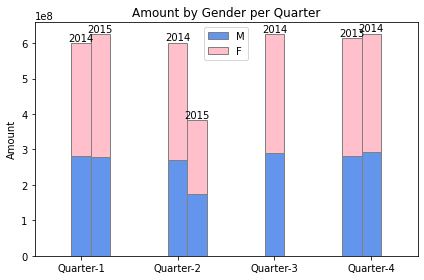

In [10]:
N = 4
labels = [f"Quarter-{i}" for i in range(1, N+1)]

x = np.arange(N)
width = 0.20

fig, ax = plt.subplots()

pivot_reset = pivot_all.reset_index()

for idx, year in enumerate(sorted(bank_data['Year'].unique()), start=-1):

    year_filtered = pivot_reset[pivot_reset['Year'] == year]
    fem_filtered = year_filtered[pivot_reset['Gender'] == 'F']
    male_filtered = year_filtered[pivot_reset['Gender'] == 'M']

    f_values = fem_filtered.iloc[:, 2:].values[0]
    m_values = male_filtered.iloc[:, 2:].values[0]

    rectsM = ax.bar(x + (idx*width), m_values, width, label='M', color='cornflowerblue', edgecolor='gray')
    rectsF = ax.bar(x + (idx*width), f_values, width, bottom=m_values, label='F', color='pink', edgecolor='gray')
    

    for rect, val in zip(rectsF, m_values):
        if val == 0:
            continue

        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, val + height + 5, year, ha="center", va="bottom"
        )

ax.set_ylabel('Amount')
ax.set_title('Amount by Gender per Quarter')
ax.set_xticks(x, labels)

# De duplicating labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

fig.tight_layout()

plt.show()

### Report 3: Top 3 Expense Type Analysis
A short analysis for the expenses types is performed to identify which unique values there are and how the observations are distributed across them.

Exp Type,Bills,Food,Fuel
Year,,,
2013,136165014,123284967,113938738


Exp Type,Bills,Food,Fuel
Year,,,
2014,543741413,491383057,481697184


Exp Type,Bills,Food,Fuel
Year,,,
2015,227166046,210055985,193499899


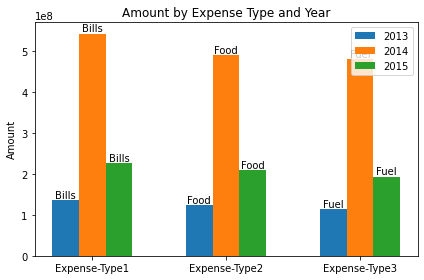

In [11]:
N = 3
x = np.arange(N)
width = 0.20

labels = [f"Expense-Type{i}" for i in range(1, N+1)]
fig, ax = plt.subplots()

for idx, year in enumerate(sorted(bank_data['Year'].unique()), start=-1):
    data = bank_data[bank_data['Year'] == year].groupby(by=['Year', 'Exp Type']).agg({'Amount': 'sum'}).sort_values(by='Amount', ascending=False).head(N)

    org_columns = list(map(lambda c: c[1], data.index.values))
    display(data.pivot_table('Amount', ['Year'], 'Exp Type')[org_columns])

    rects = ax.bar(x + (idx*width), data['Amount'], width, label=year)

    for rect, label in zip(rects, data.index.values):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label[1], ha="center", va="bottom"
        )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Amount')
ax.set_title('Amount by Expense Type and Year')
ax.set_xticks(x, labels)
ax.legend()

fig.tight_layout()

plt.show()

## Fraud detection Report
This section focuses on detecting possible fraud transactions for the data provided.

### Unique combinations
The code below obtains the unique values for the categorical data, from where we could make a first attempt to determine possible frauds, i.e. outliers for the data depending on their common combinations.

In [12]:
bank_slice = bank_data[['City', 'Card Type', 'Exp Type', 'Gender']]
bank_counts = bank_slice.value_counts(ascending=True)
count_freqs = dict(bank_counts)
bank_grouped = bank_slice.groupby(['City', 'Card Type', 'Exp Type', 'Gender']).count().reset_index()

bank_grouped.loc[:, 'count_freqs'] = count_freqs.keys()
bank_grouped['count_freqs'] = bank_grouped['count_freqs'].map(count_freqs)

unique_transactions = bank_grouped[bank_grouped.count_freqs == 1]
common_transactions = bank_grouped[bank_grouped.count_freqs > 1]

display(unique_transactions)
display(common_transactions)

,City,Card Type,Exp Type,Gender,count_freqs
0,"Achalpur, India",Gold,Bills,F,1
1,"Achalpur, India",Gold,Bills,M,1
2,"Achalpur, India",Gold,Entertainment,F,1
3,"Achalpur, India",Platinum,Grocery,F,1
4,"Achalpur, India",Signature,Fuel,M,1
...,...,...,...,...,...
5097,"Sultanganj, India",Signature,Bills,F,1
5098,"Sultanganj, India",Signature,Bills,M,1
5099,"Sultanganj, India",Signature,Fuel,F,1
5100,"Sultanganj, India",Silver,Entertainment,F,1


,City,Card Type,Exp Type,Gender,count_freqs
5102,"Sultanpur, India",Signature,Entertainment,F,2
5103,"Sultanpur, India",Signature,Entertainment,M,2
5104,"Sultanpur, India",Signature,Grocery,M,2
5105,"Sumerpur, India",Platinum,Fuel,F,2
5106,"Sumerpur, India",Platinum,Fuel,M,2
...,...,...,...,...,...
6040,"Zirakpur, India",Platinum,Food,M,128
6041,"Zirakpur, India",Platinum,Fuel,F,132
6042,"Zunheboto, India",Signature,Bills,M,138
6043,"Zunheboto, India",Silver,Entertainment,F,138


From the above summaries, we can see that there are 5,102 unique types of transactions, that were never seen before. While there are 943 types of transactions that are the most common ways to perform expenses.

In [13]:
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install tqdm
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install nbformat
!{sys.executable} -m pip install umap-learn

You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.


In [14]:
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from tqdm import tqdm
import plotly.graph_objects as go
import umap

/Users/eduardo.gutierrez/Envs/assignment3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [108]:
bank_hot = bank_grouped.drop('count_freqs', 1)
bank_hot['City'] = bank_hot['City'].map(lambda c: c.replace(", India", ""))
data = pd.get_dummies(bank_hot)

#Pre-processing
for c in data.columns:
    pt = PowerTransformer()
    data.loc[:, c] = pt.fit_transform(np.array(data[c]).reshape(-1, 1))

#Actual Clustering
kmeans = KMeans(n_clusters=15).fit(data)
kmeans_labels = kmeans.labels_

#OPTIONAL: Elbow plot with inertia
#Elbow method to choose the optimal number of clusters
sse = {}
for k in tqdm(range(2, 20)):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    


In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
100%|██████████| 18/18 [00:24<00:00,  1.37s/it]


In [109]:
fig = go.Figure(data=go.Scatter(x=list(sse.keys()), y=list(sse.values())))
fig.show()

In [111]:
bank_summary = bank_data.groupby(['City', 'Card Type', 'Exp Type', 'Gender']).agg({'Amount': 'sum'}).reset_index()
bank_summary['City'] =  bank_summary['City'].map(lambda c: c.replace(", India", ""))

In [112]:
#Preprocessing numerical
bank_summary = bank_data.groupby(['City', 'Card Type', 'Exp Type', 'Gender']).agg({'Amount': 'mean'}).reset_index()
numerical = bank_summary.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = bank_summary.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(bank_summary.select_dtypes(include='object').columns) / bank_summary.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.umap_.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.umap_.reset_local_connectivity(intersection)


gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable


In [113]:
embedding = umap.umap_.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1._initial_alpha, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                200, 'random', np.random, fit1.metric, 
                                                fit1._metric_kwds, False, densmap_kwds={}, output_dens=False)

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


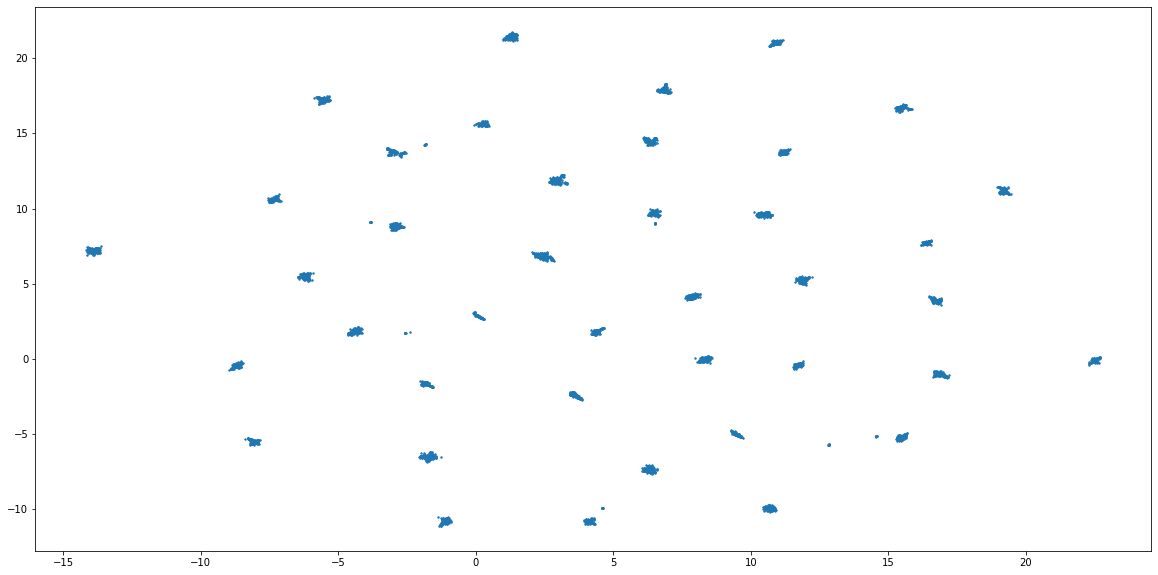

In [114]:
plt.figure(figsize=(20, 10))
plt.scatter(*np.array(embedding)[0].T, s=2, cmap='Spectral', alpha=1.0)
plt.show()


In [115]:
embedded_array = np.array(embedding)

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [116]:
kmeans_labels.shape

(6045,)

In [117]:
embedded_array[0][:, 0].shape

(6045,)

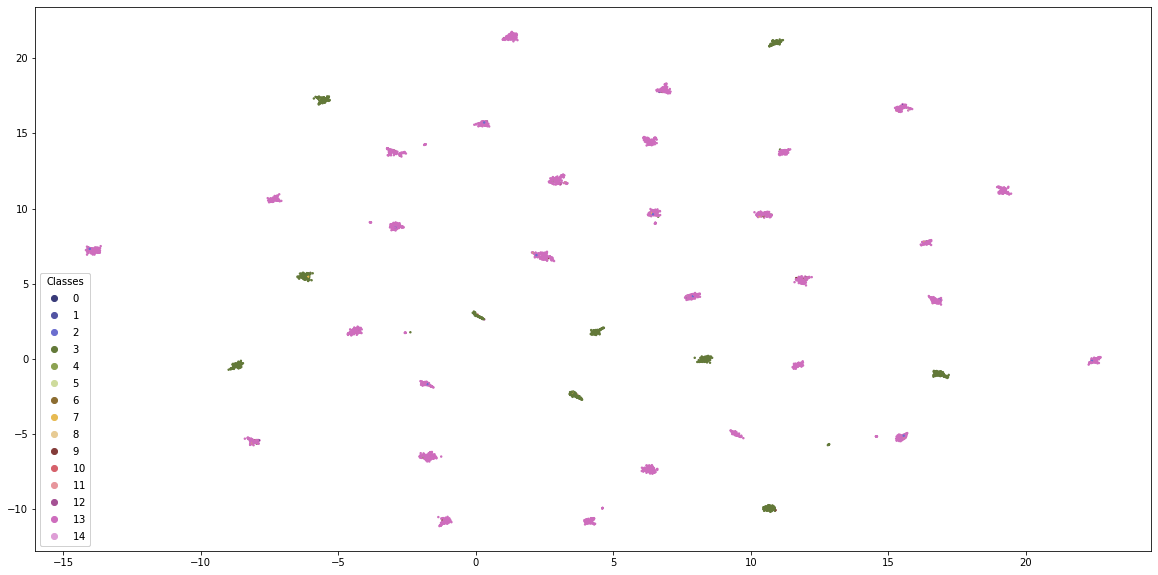

In [118]:
fig, ax = plt.subplots()
fig.set_size_inches((20, 10))
scatter = ax.scatter(*embedded_array[0].T, s=2, c=kmeans_labels, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num=15),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)


In [79]:
!{sys.executable} -m pip install lightgbm
!{sys.executable} -m pip install shap

You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 433 kB 1.8 MB/s            
  Using cached cloudpickle-2.0.0-py3-none-any.whl (25 kB)
You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.


In [81]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
import shap

In [119]:
#Setting the objects to category 
bank_d_copy = bank_summary.copy()

for c in bank_d_copy.select_dtypes(include='object'):
    bank_d_copy[c] = bank_d_copy[c].astype('category')

#KMeans clusters
clf_km = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_km = cross_val_score(clf_km, bank_d_copy, kmeans_labels, scoring='f1_weighted')
print(f'CV F1 score for K-Means clusters is {np.mean(cv_scores_km)}')



[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
CV F1 score for K-Means clusters is 0.9746308648638976


A CV score for K-means is 0.976 which means that the transactions are grouped in meaningful and distinguishable clusters.

[LightGBM] [Warning] Unknown parameter: colsample_by_tree


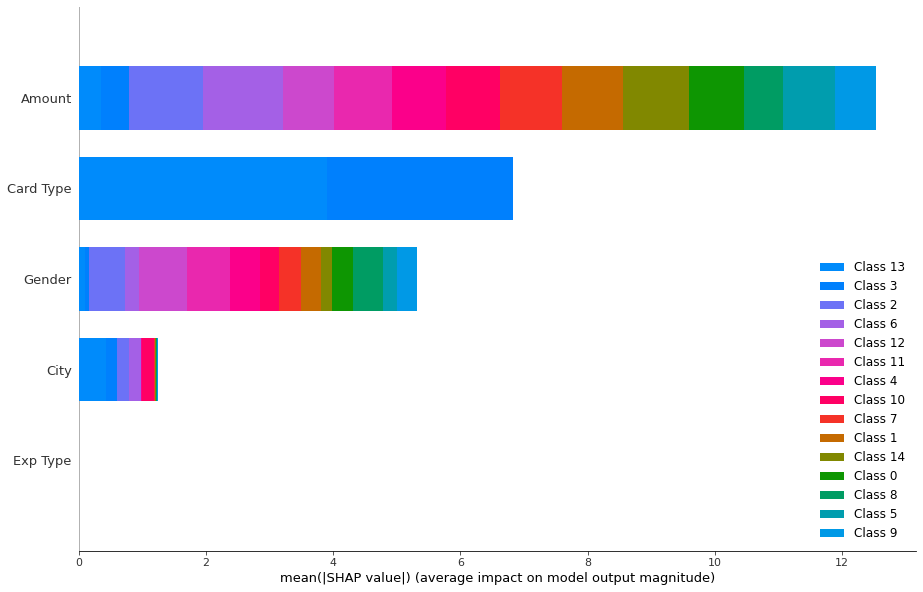

In [120]:
clf_km.fit(bank_d_copy, kmeans_labels)

#SHAP values
explainer_km = shap.TreeExplainer(clf_km)
shap_values_km = explainer_km.shap_values(bank_d_copy)
shap.summary_plot(shap_values_km, bank_d_copy, plot_type="bar", plot_size=(15, 10))

## References
* [Simple Scatter Plots](https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html)
* [Stacked bar chart](https://matplotlib.org/3.5.1/gallery/lines_bars_and_markers/bar_stacked.html)
* [Group and Aggregate by One or More Columns in Pandas](https://jamesrledoux.com/code/group-by-aggregate-pandas)
* [Print Visually Pleasing DataFrames in For Loop in Jupyter Notebook Pandas](https://stackoverflow.com/a/54138918/3211335)
* [Matplotlib - Bar Plot](https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm)
* [Grouped bar chart with labels](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html)
* [Pandas get topmost n records within each group](https://stackoverflow.com/questions/20069009/pandas-get-topmost-n-records-within-each-group)
* [How to access column after pandas .groupby](https://stackoverflow.com/questions/58435657/how-to-access-column-after-pandas-groupby)
* [Adding value labels on a matplotlib bar chart](https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart)
* [Preserve Column Order When Using Pivot](https://stackoverflow.com/questions/62269086/preserve-column-order-when-using-pivot)
* [Pandas Pivot Table List of Aggfunc](https://stackoverflow.com/questions/34193862/pandas-pivot-table-list-of-aggfunc)
* [Plot values in specific column range for a particular row in a pandas data frame](https://stackoverflow.com/questions/31734371/plot-values-in-specific-column-range-for-a-particular-row-in-a-pandas-data-frame)
* [Python Pandas: Convert Rows as Column headers [duplicate]](https://stackoverflow.com/questions/17298313/python-pandas-convert-rows-as-column-headers)
* [pandas DataFrame: replace nan values with average of columns](https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns)
* [Extracting just Month and Year separately from Pandas Datetime column](https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column)
* [How to Sort Pandas DataFrame (with examples)](https://datatofish.com/sort-pandas-dataframe/)
* [Get statistics for each group (such as count, mean, etc) using pandas GroupBy?](https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby)
* [how to sort the result by pandas.value_counts](https://stackoverflow.com/questions/61158963/how-to-sort-the-result-by-pandas-value-counts)